In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Linear Regression

In [2]:
from sklearn import linear_model
df = pd.read_csv("linear_regression_df.csv")
df.columns = ["X", "Y"]
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


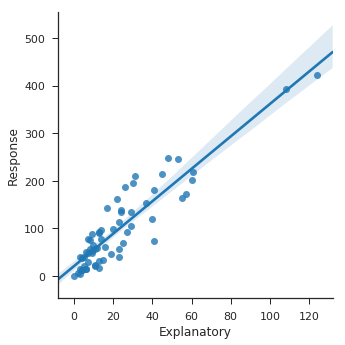

In [8]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot("X","Y", data=df)
plt.ylabel("Response")
plt.xlabel("Explanatory")

In [12]:
linear = linear_model.LinearRegression()

trainX = np.asarray(df.X[20:]).reshape(-1,1)
trainY = np.asarray(df.Y[20:]).reshape(-1,1)

testX = np.asarray(df.X[:20]).reshape(-1,1)
testY = np.asarray(df.Y[:20]).reshape(-1,1)

linear.fit(trainX, trainY)
score = linear.score(trainX, trainY)

print("Coef: ", linear.coef_)
print("Intercept: ", linear.intercept_)
print("R2: ", score)

predicted = linear.predict(testX)

Coef:  [[ 3.43948437]]
Intercept:  [ 24.00493255]
R2:  0.703654905355


# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("logistic_regression_df.csv")
df.columns = ["X", "Y"]
df.head()

,X,Y
0,26.6,0
1,23.3,1
2,28.1,0
3,43.1,1
4,25.6,0


ImportError: No module named 'statsmodels'

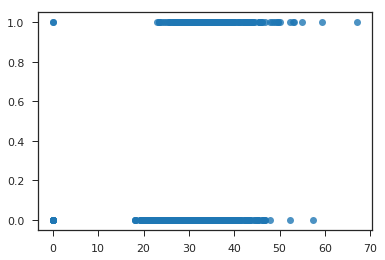

In [17]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.regplot("X", "Y", data=df, logistic=True)
plt.ylabel("Prob")
plt.xlabel("Expl")

In [18]:
logistic = LogisticRegression()
X = np.asarray(df.X).reshape(-1,1)
Y = np.asarray(df.Y).ravel()

logistic.fit(X,Y)
score = logistic.score(X,Y)

print("Coef: ", logistic.coef_)
print("Intercept: ", logistic.intercept_)
print("R2: ", score)


Coef:  [[ 0.07861888]]
Intercept:  [-3.17496229]
R2:  0.670143415906


# Decision Tree

In [19]:
from sklearn import tree
df = pd.read_csv("iris_df.csv")
df.columns = ["X1", "X2", "X3", "X4", "Y"]
df.head()

,X1,X2,X3,X4,Y
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [20]:
from sklearn.cross_validation import train_test_split
decision = tree.DecisionTreeClassifier(criterion="gini")
X = df.values[:, 0:4]
Y = df.values[:, 4]

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3)

decision.fit(trainX, trainY)
print("Accuracy: ", decision.score(testX, testY))

Accuracy:  0.977777777778


/home/maxime/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


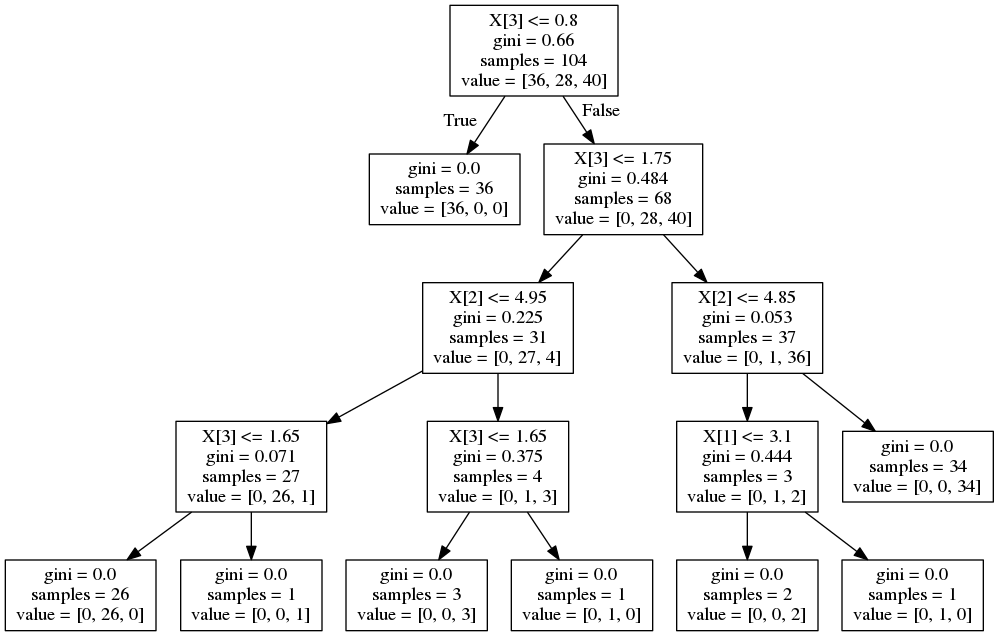

In [22]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus as pydot

dot_data = StringIO()
tree.export_graphviz(decision, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# SVM

In [23]:
from sklearn import svm
df = pd.read_csv("iris_df.csv")
df.columns = ["X4", "X3", "X1", "X2", "Y"]
df = df.drop(["X4", "X3"], 1)
df.head()

,X1,X2,Y
0,1.4,0.2,Iris-setosa
1,1.3,0.2,Iris-setosa
2,1.5,0.2,Iris-setosa
3,1.4,0.2,Iris-setosa
4,1.7,0.4,Iris-setosa


In [24]:
from sklearn.cross_validation import train_test_split
support = svm.SVC()
X = df.values[:,0:2]
Y = df.values[:, 2]

trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3)

support.fit(trainX, trainY)
print("Accuracy: ", support.score(testX, testY))
pred = support.predict(testX)


Accuracy:  1.0


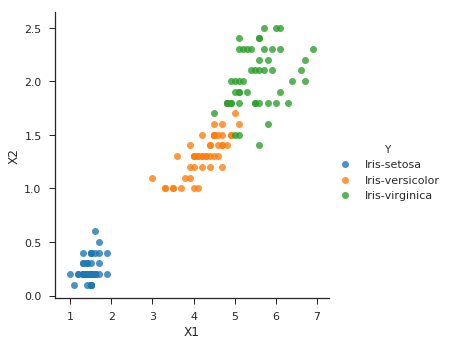

In [30]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot("X1", "X2", scatter=True, fit_reg=False, data=df, hue="Y")


# K-Nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_csv("iris_df.csv")
df.columns = (["X1", "X2", "X3", "X4", "Y"])
df = df.drop(["X3", "X4"],1)
df.head()

,X1,X2,Y
0,4.9,3.0,Iris-setosa
1,4.7,3.2,Iris-setosa
2,4.6,3.1,Iris-setosa
3,5.0,3.6,Iris-setosa
4,5.4,3.9,Iris-setosa


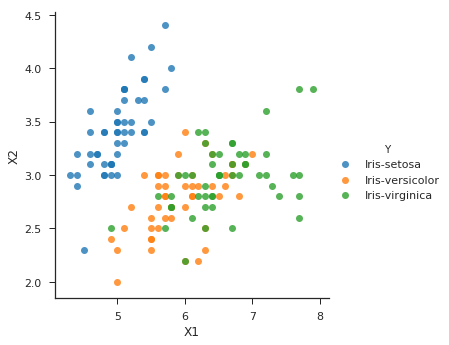

In [35]:
sns.lmplot("X1", "X2", scatter=True, fit_reg=False, data=df, hue="Y")

In [36]:
from sklearn.cross_validation import train_test_split
neighbors = KNeighborsClassifier(n_neighbors=5)
X = df.values[:,0:2]
Y = df.values[:, 2]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3)
neighbors.fit(trainX, trainY)

print("Accuracy: ", neighbors.score(testX, testY))

Accuracy:  0.822222222222


# Random Forests

In [38]:
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("iris_df.csv")
df.columns = ["X1", "X2", "X3", "X4", "Y"]
df.head()

,X1,X2,X3,X4,Y
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [39]:
from sklearn.cross_validation import train_test_split
forest = RandomForestClassifier()
X = df.values[:, 0:4]
Y = df.values[:, 4]
trainX, testX, trainY, testY = train_test_split(X,Y, test_size=0.3)
forest.fit(trainX, trainY)
score = forest.score(testX, testY)
print("Score: ", score)

Score:  0.955555555556


# K-means clustering

In [41]:
from sklearn.cluster import KMeans
df = pd.read_csv("iris_df.csv")
df.columns = ["X1", "X2", "X3", "X4", "Y"]
df = df.drop(["X4", "X3"], 1)
df.head()


,X1,X2,Y
0,4.9,3.0,Iris-setosa
1,4.7,3.2,Iris-setosa
2,4.6,3.1,Iris-setosa
3,5.0,3.6,Iris-setosa
4,5.4,3.9,Iris-setosa


In [43]:
from sklearn.cross_validation import train_test_split


kmeans = KMeans(n_clusters=3)
X = df.values[:, 0:2]
kmeans.fit(X)
df["Pred"] = kmeans.predict(X)
df.head()

,X1,X2,Y,Pred
0,4.9,3.0,Iris-setosa,0
1,4.7,3.2,Iris-setosa,0
2,4.6,3.1,Iris-setosa,0
3,5.0,3.6,Iris-setosa,0
4,5.4,3.9,Iris-setosa,0


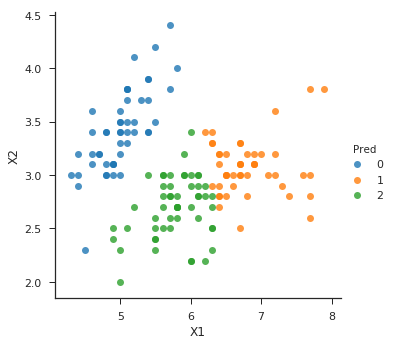

In [45]:
sns.lmplot("X1", "X2", scatter=True, fit_reg=False, data=df, hue="Pred")

# Principal Components Analysis

In [47]:
from sklearn import decomposition


df = pd.read_csv("iris_df.csv")
df.columns = ["X1", "X2", "X3", "X4", "Y"]
df.head()

,X1,X2,X3,X4,Y
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
from sklearn import decomposition
pca = decomposition.PCA()

fa = decomposition.FactorAnalysis()

X = df.values[:, 0:4]


Y = df.values[:, 4]
train, test = train_test_split(X,test_size = 0.3)